**this project aims to use RNN and LSTM in finding short term pattern and use linear and tree models to train a general long pattern to rise up the accuracy and lower the RMSLE,data is stock price of apple industry and we want to predict last 10 days from data base**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
!pip install lightgbm
import lightgbm
import os

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
os.chdir("/content/drive/MyDrive")
data=pd.read_csv("apple_stock_data.csv",parse_dates=['Date'])

the data is consist of Date and stock price of apple industry and volume

In [ ]:
data

,Date,Adj Close,Close,High,Low,Open,Volume
0,2023-11-02 00:00:00+00:00,176.665985,177.570007,177.779999,175.460007,175.520004,77334800
1,2023-11-03 00:00:00+00:00,175.750671,176.649994,176.820007,173.350006,174.240005,79763700
2,2023-11-06 00:00:00+00:00,178.317520,179.229996,179.429993,176.210007,176.380005,63841300
3,2023-11-07 00:00:00+00:00,180.894333,181.820007,182.440002,178.970001,179.179993,70530000
4,2023-11-08 00:00:00+00:00,181.958893,182.889999,183.449997,181.589996,182.350006,49340300
...,...,...,...,...,...,...,...
247,2024-10-28 00:00:00+00:00,233.399994,233.399994,234.729996,232.550003,233.320007,36087100
248,2024-10-29 00:00:00+00:00,233.669998,233.669998,234.330002,232.320007,233.100006,35417200
249,2024-10-30 00:00:00+00:00,230.100006,230.100006,233.470001,229.550003,232.610001,47070900
250,2024-10-31 00:00:00+00:00,225.910004,225.910004,229.830002,225.369995,229.339996,64370100


In [ ]:
data=data.sort_values(ascending=False,by=['Date'])

In [ ]:
data.sort_values(by=["Date"],inplace=True,ascending=True)
data.Date.head(20)

,Date
0,2023-11-02 00:00:00+00:00
1,2023-11-03 00:00:00+00:00
2,2023-11-06 00:00:00+00:00
3,2023-11-07 00:00:00+00:00
4,2023-11-08 00:00:00+00:00
5,2023-11-09 00:00:00+00:00
6,2023-11-10 00:00:00+00:00
7,2023-11-13 00:00:00+00:00
8,2023-11-14 00:00:00+00:00
9,2023-11-15 00:00:00+00:00


In [ ]:
da=data.copy()

**The first step in building our first RNN model is to give date time in a suitable way and with giving Date time in seperate coulmns gives a proper result**

In [ ]:
da["saleYear"] = da.Date.dt.year
da["saleMonth"] = da.Date.dt.month
da["saleDay"] = da.Date.dt.day
da["saleDayofweek"] = da.Date.dt.dayofweek
da["saleDayofyear"] = da.Date.dt.dayofyear
da.drop("Date", axis=1, inplace=True)

In [ ]:
da

,Adj Close,Close,High,Low,Open,Volume,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,176.665985,177.570007,177.779999,175.460007,175.520004,77334800,2023,11,2,3,306
1,175.750671,176.649994,176.820007,173.350006,174.240005,79763700,2023,11,3,4,307
2,178.317520,179.229996,179.429993,176.210007,176.380005,63841300,2023,11,6,0,310
3,180.894333,181.820007,182.440002,178.970001,179.179993,70530000,2023,11,7,1,311
4,181.958893,182.889999,183.449997,181.589996,182.350006,49340300,2023,11,8,2,312
...,...,...,...,...,...,...,...,...,...,...,...
247,233.399994,233.399994,234.729996,232.550003,233.320007,36087100,2024,10,28,0,302
248,233.669998,233.669998,234.330002,232.320007,233.100006,35417200,2024,10,29,1,303
249,230.100006,230.100006,233.470001,229.550003,232.610001,47070900,2024,10,30,2,304
250,225.910004,225.910004,229.830002,225.369995,229.339996,64370100,2024,10,31,3,305


In [ ]:
da.isnull().sum()

,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0
saleYear,0
saleMonth,0
saleDay,0
saleDayofweek,0


In [ ]:
da.drop(columns=['Low','High','Adj Close','Open','Volume'],inplace=True)

In [ ]:
da.columns

Index(['Close', 'saleYear', 'saleMonth', 'saleDay', 'saleDayofweek',
       'saleDayofyear'],
      dtype='object')

In [ ]:
da.Close=da.Close/da.Close.max()

In [ ]:
da

,Close
Date,
2023-11-02 00:00:00+00:00,0.750888
2023-11-03 00:00:00+00:00,0.746998
2023-11-06 00:00:00+00:00,0.757908
2023-11-07 00:00:00+00:00,0.768860
2023-11-08 00:00:00+00:00,0.773385
...,...
2024-10-28 00:00:00+00:00,0.986976
2024-10-29 00:00:00+00:00,0.988117
2024-10-30 00:00:00+00:00,0.973021


In [ ]:

import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from tensorflow.keras.layers import SimpleRNN

In [ ]:
da

,Close
Date,
2023-11-02 00:00:00+00:00,0.750888
2023-11-03 00:00:00+00:00,0.746998
2023-11-06 00:00:00+00:00,0.757908
2023-11-07 00:00:00+00:00,0.768860
2023-11-08 00:00:00+00:00,0.773385
...,...
2024-10-28 00:00:00+00:00,0.986976
2024-10-29 00:00:00+00:00,0.988117
2024-10-30 00:00:00+00:00,0.973021


now model will be trained to predict last 10 days in our data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test=da.drop(columns=["Close"])[0:len(da)-10],da.drop(columns=["Close"])[len(da)-10:]
y_train, y_test=da.Close[0:len(da)-10],da.Close[len(da)-10:]

In [ ]:
X_train

,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,2023,11,2,3,306
1,2023,11,3,4,307
2,2023,11,6,0,310
3,2023,11,7,1,311
4,2023,11,8,2,312
...,...,...,...,...,...
237,2024,10,14,0,288
238,2024,10,15,1,289
239,2024,10,16,2,290
240,2024,10,17,3,291


In [ ]:
model = Sequential()
model.add(SimpleRNN(units=300, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=150,  return_sequences=True))
model.add(SimpleRNN(units=150,  return_sequences=True))
model.add(SimpleRNN(units=40,  return_sequences=True))
model.add(SimpleRNN(units=10))
model.add(Dense(1))
model.compile(loss='MSE', optimizer='adam',metrics=['mean_squared_error'])
model.fit(X_train, y_train,epochs=250, batch_size=32)

Epoch 1/250


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 1.3194 - mean_squared_error: 1.3194
Epoch 2/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 3/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 4/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 5/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 6/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 7/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 8/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 9/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0056 - mean_squared_error: 0.0056
Epoch 10/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0056 - mean_squared_error: 0.0056
Epoch 11/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0054 - mea

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step


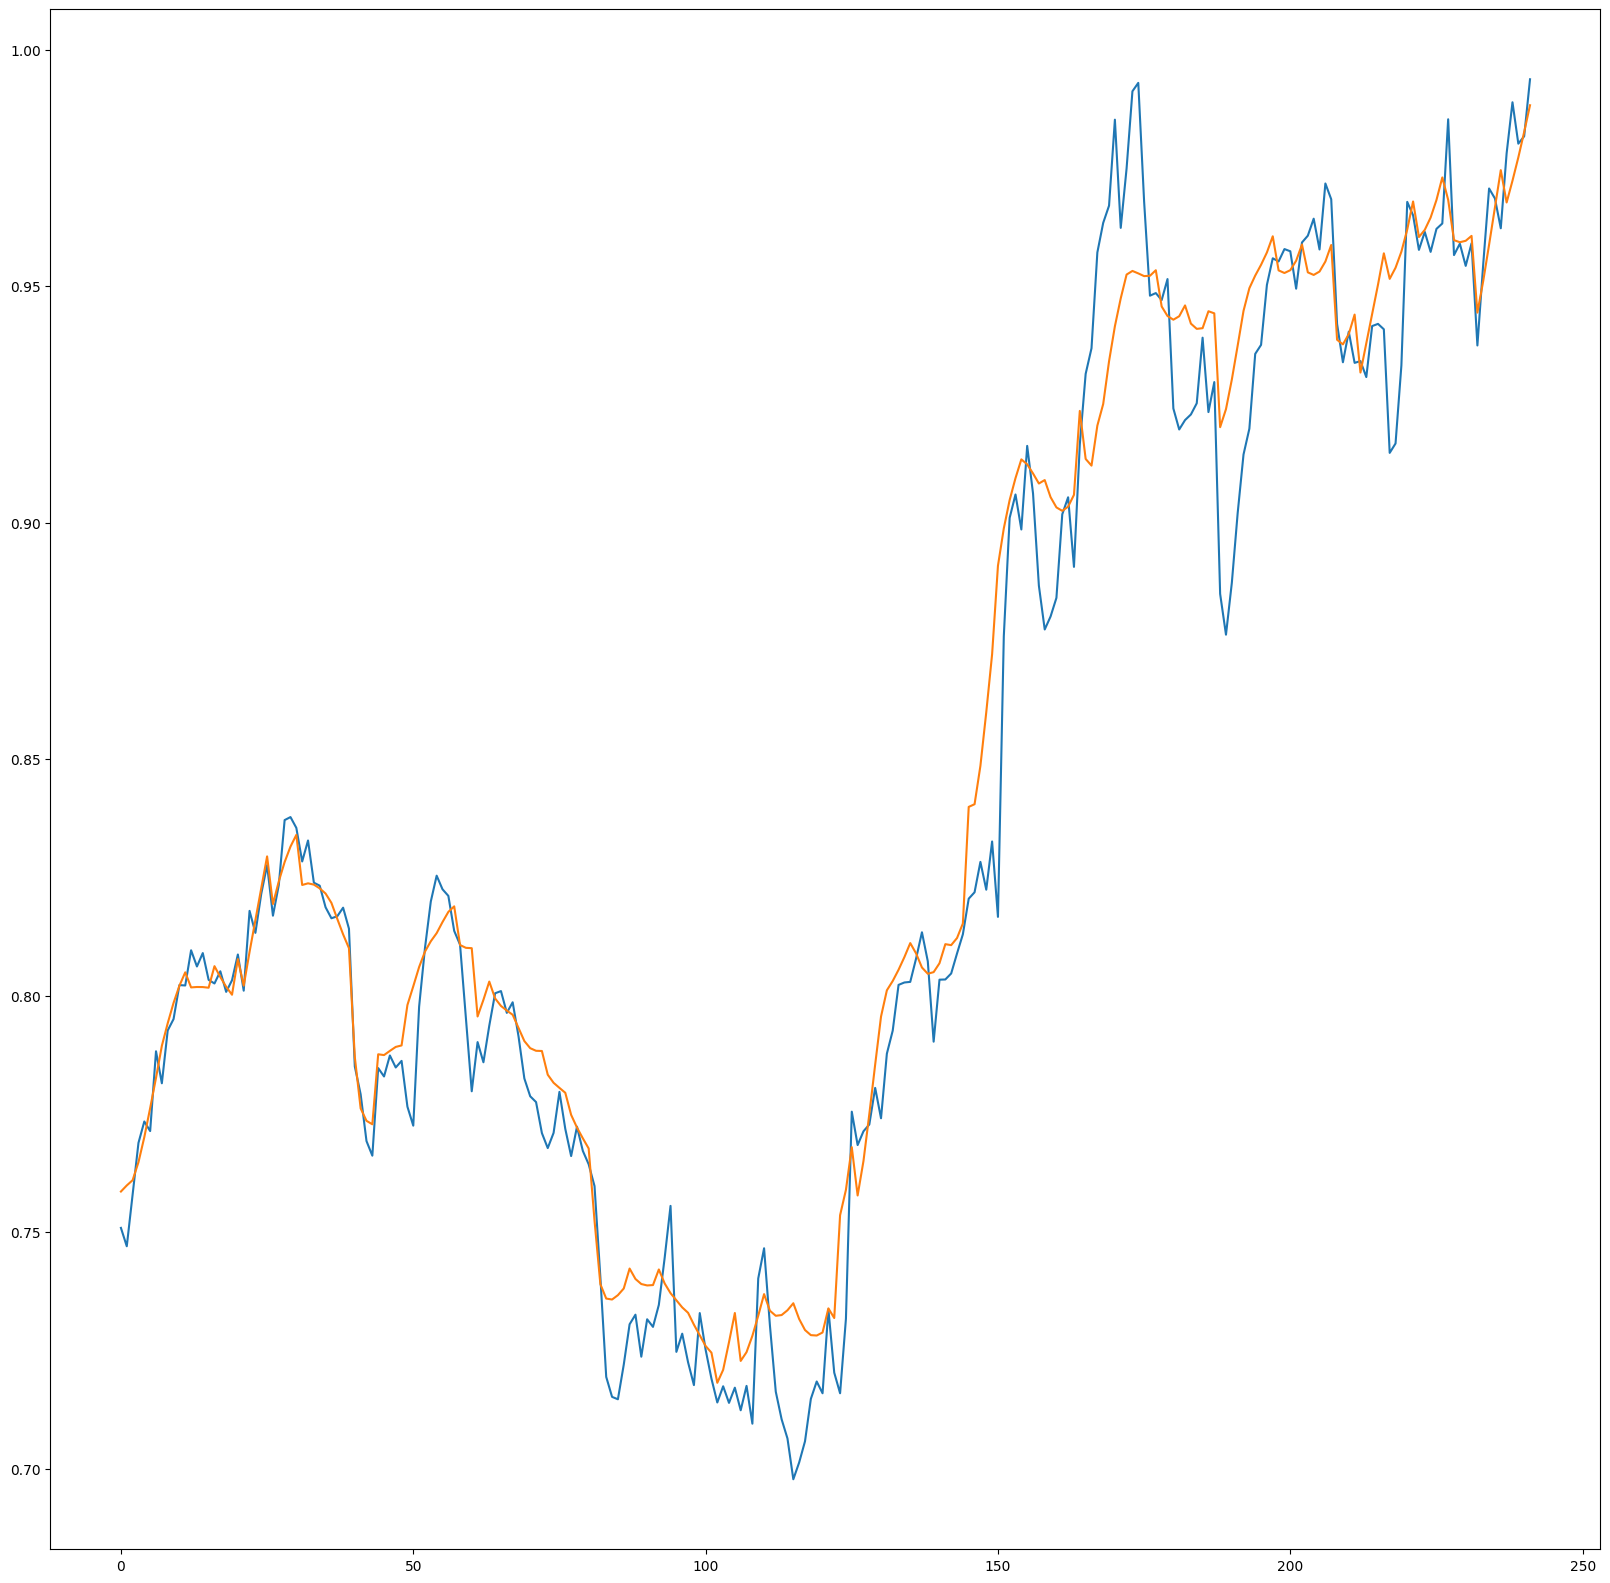

In [ ]:

y_hat = model.predict(X_train)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.plot(range(len(y_train)), y_train)
plt.plot(range(len(y_hat)), y_hat)

In [ ]:
m=np.reshape(model.predict(X_test),(10,))
rmsle(y_test,m)
m*data.Close.max()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([229.28505, 229.41907, 229.67125, 230.03693, 230.47116, 226.69092,
       226.22723, 226.0019 , 226.01422, 179.14554], dtype=float32)

next step is to sparate train,test data into sequncese and give them to out LSTM , linear and tree models

In [ ]:
import numpy as np
def create_sequences(da, seq_length=60):
    X, y = [], []
    for i in range(len(da) - seq_length):
        X.append(da[i:i+seq_length])
        y.append(da[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(da['Close'].values, seq_length)
train_size = int(len(X) * 0.95)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

lstm_model = Sequential()
lstm_model.add(LSTM(units=70, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=15))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0619
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0085
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0093
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0051
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0015
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0024
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0017
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0012
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0013
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0012
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0013
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0011
Epoch 13/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0011
Epoch 14/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0011
Epoch 15/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0011
Epoch 16/100
6/6 ━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


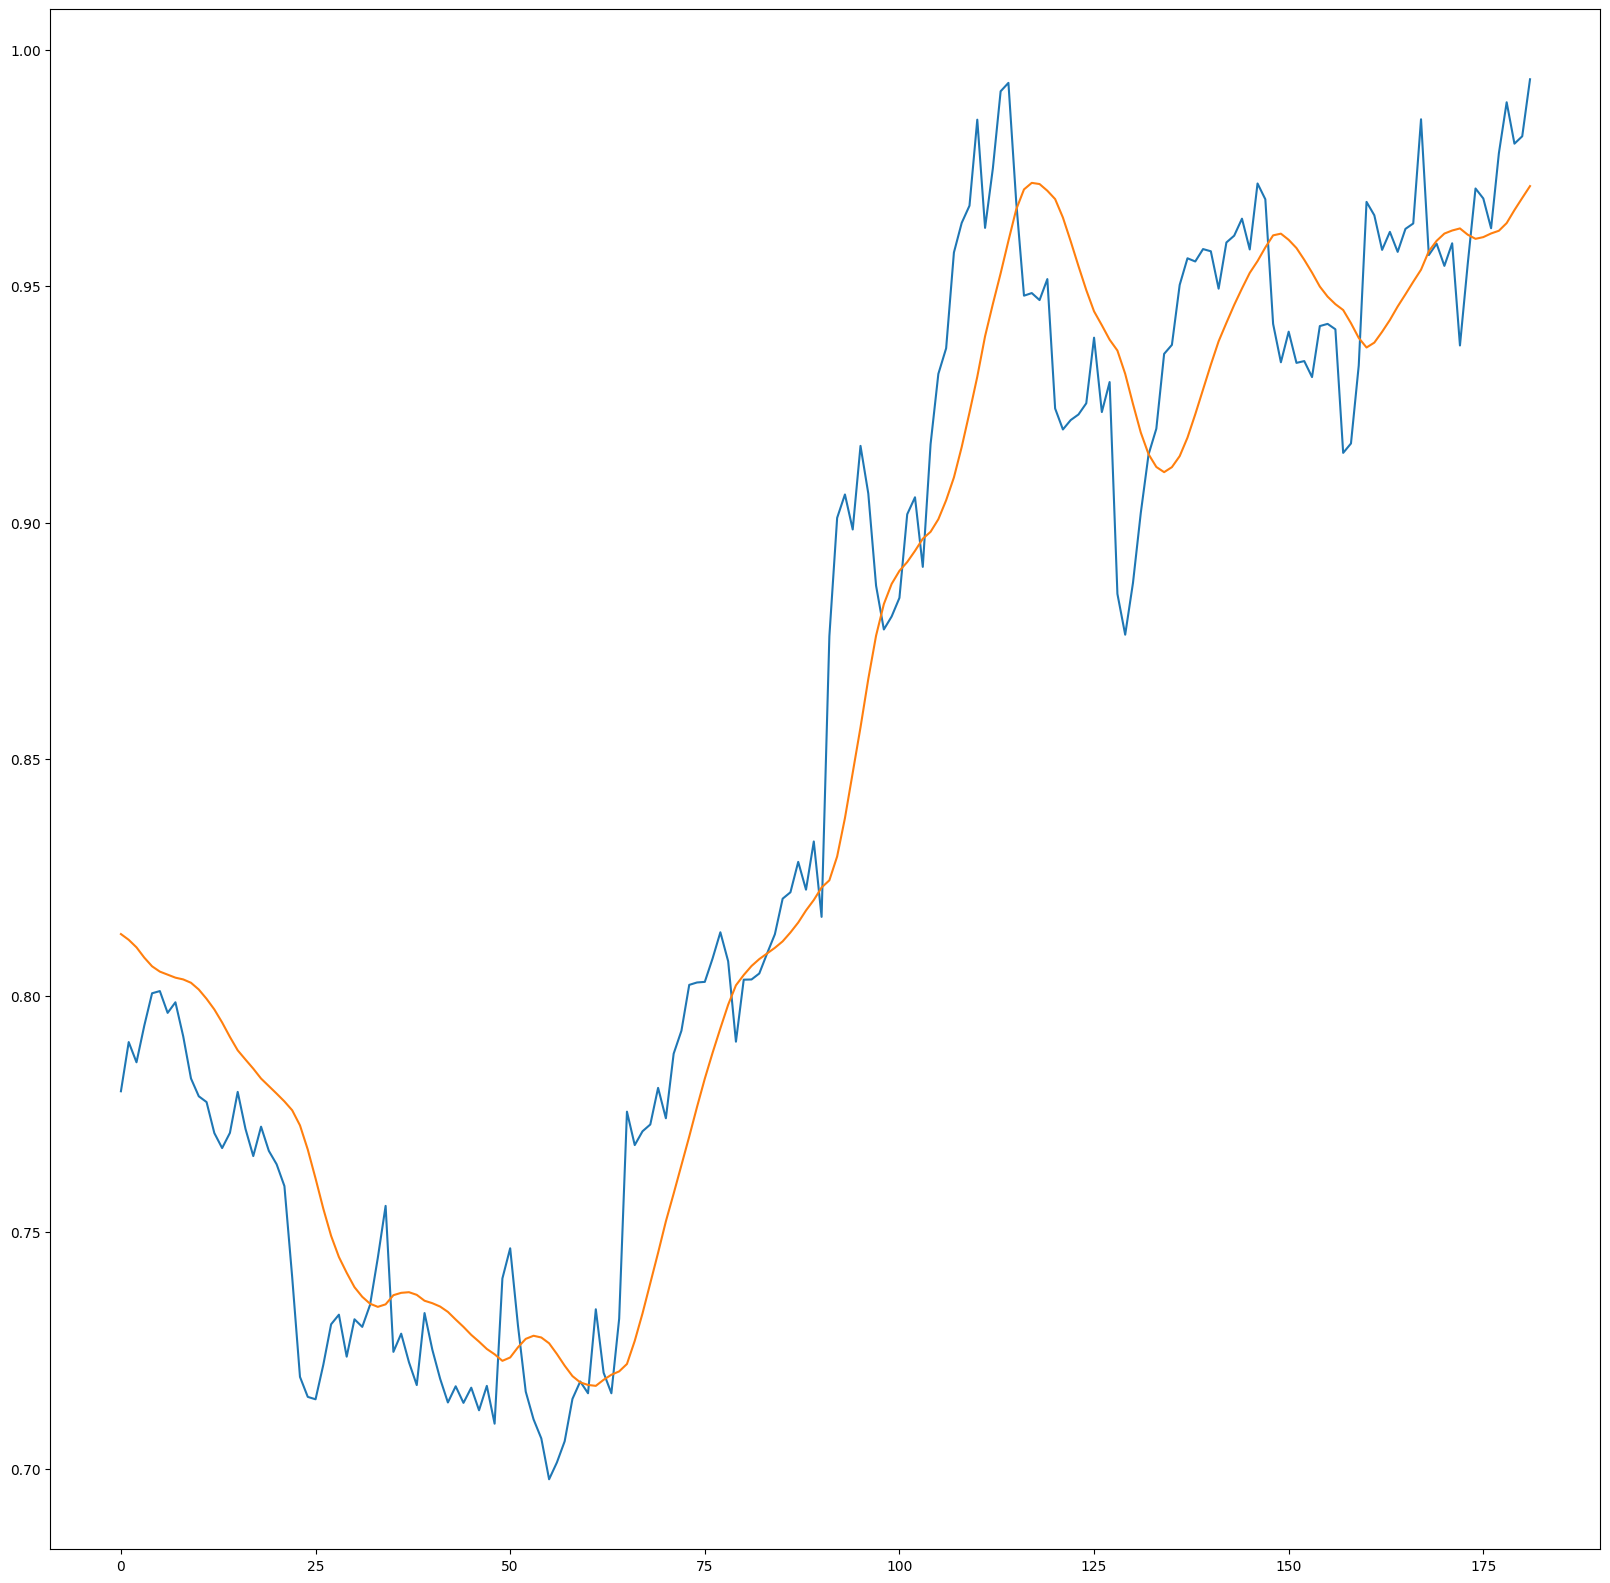

In [ ]:

y_hat = lstm_model.predict(X_train)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.plot(range(len(y_train)), y_train)
plt.plot(range(len(y_hat)), y_hat)

In [ ]:
m1=np.reshape(lstm_model.predict(X_test),(10,))
rmsle(y_test,m1)
m1*data.Close.max()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([230.40807, 231.28021, 232.11581, 232.52403, 232.68849, 232.74738,
       232.86316, 232.99933, 232.88208, 232.3585 ], dtype=float32)

RNN find out structure of trend when LSTM find the general pattern of moevment in price so they get mixed to give us the best results

In [ ]:
final=(m1*0.6+m*0.4)

In [ ]:
final*data.Close.max()

array([229.95886, 230.53575, 231.138  , 231.52919, 231.80156, 230.3248 ,
       230.2088 , 230.20036, 230.13493, 211.07332], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model

tree model get trained and from the base on the results it works like LSTM here

In [ ]:
from sklearn.ensemble import RandomForestRegressor
ideal_model = RandomForestRegressor(n_estimators=400,
                                    max_features=0.75,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

val_preds = ideal_model.predict(X_test)
rmsle(y_test,val_preds)

0.006769418819812963

In [ ]:
ideal_model.predict(X_test)*data.Close.max()

array([231.64787479, 231.27567471, 230.83442535, 230.46250034,
       229.57682529, 230.07287514, 229.90937492, 229.63712475,
       229.43579948, 226.72799976])

In [ ]:
m

array([0.9695748 , 0.97014153, 0.9712079 , 0.9727543 , 0.97459054,
       0.95860505, 0.9566443 , 0.95569146, 0.9557435 , 0.7575505 ],
      dtype=float32)

In [ ]:
hybrid_result=final*0.4+ideal_model.predict(X_test)*0.6
rmsle(y_test,hybrid_result)

0.0060112864999324785

In [ ]:
hybrid_result*data.Close.max()

array([232.31019482, 232.26945127, 232.22222747, 232.22069296,
       231.89547407, 231.86591669, 231.8178408 , 231.71615061,
       231.65540146, 224.41494727])

the last model is linear model and it prefects for using with neural models for this kind of Databases


In [ ]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin=lin_model.predict(X_test)

In [ ]:
lin*data.Close.max()

array([239.36503128, 232.72723197, 236.06682541, 230.47521447,
       232.29335578, 232.45090579, 232.25164943, 233.86869614,
       227.51164322, 225.80306834])

In [ ]:
hybrid_result=final*0.3+lin*0.7
rmsle(y_test,hybrid_result)

0.00484282569697361

the reuslt is very close to the test data and the important thing is it nearly followed the test trend


In [ ]:
hybrid_result*data.Close.max()

array([236.54317952, 232.06978921, 234.58817826, 230.79140811,
       232.14582457, 231.81308001, 231.63879924, 232.76820183,
       228.29863708, 221.38414782])

In [ ]:
data.Close[-10:]

,Close
242,236.479996
243,235.860001
244,230.759995
245,230.570007
246,231.410004
247,233.399994
248,233.669998
249,230.100006
250,225.910004
251,222.910004
